In [1]:
import numpy as np
import pandas as pd
from random import sample
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datapath = r".\Wine.csv"
df = pd.read_csv(datapath)
df

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,13.01,3.66,2.21,16.53,98.87,2.46,2.34,0.28,1.49,3.69,0.75,2.79,588.86
1,0,13.13,1.14,2.32,18.75,108.51,2.63,2.26,0.13,2.15,5.03,0.86,2.66,954.80
2,0,12.57,1.06,1.88,10.41,83.50,2.35,2.68,0.10,2.57,5.82,0.98,2.49,962.49
3,0,13.08,0.79,2.32,11.70,86.91,2.63,2.57,0.05,1.14,3.14,0.65,2.86,784.26
4,0,14.04,2.12,2.60,17.51,120.60,2.58,2.48,0.31,1.23,4.98,1.05,3.56,1286.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2,13.65,5.57,2.43,20.25,93.94,1.63,0.54,0.51,1.02,7.53,0.62,1.69,716.70
479,2,13.22,4.97,2.28,18.47,86.31,1.30,0.00,0.44,0.71,6.29,0.50,1.31,548.39
480,2,12.15,0.38,2.08,15.10,109.58,0.97,0.38,0.10,0.44,2.08,0.56,0.67,356.25
481,2,13.34,1.48,2.59,21.93,86.55,2.49,0.93,0.50,2.19,11.35,0.53,1.66,565.98


In [3]:
'''
1. (5%) Please split wine.csv into training data and test data. 
When  splitting, please randomly select 20 instances of each category as  testing data. 
Then save the training dataset as train.csv and testing  dataset as test.csv. 
(423 instances for training and 60 instances for  testing.) 
'''

N = 20
class0 = df[df['target'] == 0].reset_index()
index0 = sample(list(class0.index), N)
class1 = df[df['target'] == 1].reset_index()
index1 = sample(list(class1.index), N)
class2 = df[df['target'] == 2].reset_index()
index2 = sample(list(class2.index), N)

train0 = class0.iloc[[i for i in list(class0.index) if i not in index0]]
test0 = class0.iloc[index0]
train1 = class1.iloc[[i for i in list(class1.index) if i not in index1]]
test1 = class1.iloc[index1]
train2 = class2.iloc[[i for i in list(class2.index) if i not in index2]]
test2 = class2.iloc[index2]

train = pd.concat([train0, train1, train2]).reset_index().drop(['index','level_0'], axis="columns", inplace=False)
test = pd.concat([test0, test1, test2]).reset_index().drop(['index','level_0'], axis="columns", inplace=False)

train.to_csv(r".\train.csv",index = False)
test.to_csv(r".\test.csv",index = False)
train

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,13.01,3.66,2.21,16.53,98.87,2.46,2.34,0.28,1.49,3.69,0.75,2.79,588.86
1,0,13.13,1.14,2.32,18.75,108.51,2.63,2.26,0.13,2.15,5.03,0.86,2.66,954.80
2,0,12.57,1.06,1.88,10.41,83.50,2.35,2.68,0.10,2.57,5.82,0.98,2.49,962.49
3,0,13.08,0.79,2.32,11.70,86.91,2.63,2.57,0.05,1.14,3.14,0.65,2.86,784.26
4,0,14.04,2.12,2.60,17.51,120.60,2.58,2.48,0.31,1.23,4.98,1.05,3.56,1286.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2,12.41,3.16,2.26,20.32,100.96,1.48,0.85,0.13,0.64,4.18,0.70,1.04,488.92
419,2,12.13,1.38,2.17,21.21,86.08,0.63,0.26,0.17,0.35,3.77,0.47,0.77,297.19
420,2,13.65,5.57,2.43,20.25,93.94,1.63,0.54,0.51,1.02,7.53,0.62,1.69,716.70
421,2,13.22,4.97,2.28,18.47,86.31,1.30,0.00,0.44,0.71,6.29,0.50,1.31,548.39


In [4]:
# 分成資料跟類別
x_train = train.drop('target', axis='columns').values
y_train = train['target'].values
x_test = test.drop('target', axis='columns').values
y_test = test['target'].values

In [5]:
def Bayes_calprob(x,y):
    # P(c|x) = P(x|c)P(c)/P(x)
    # P(c|x) : Posteriori probability
    # P(x|c) : likelihood functions
    # P(c) : class prior probability
    # P(x) : predictor prior probability
    
    classes = list(set(y))
    features = x.shape[1]
    class_priors = [0 for i in range(len(classes))]
    likelihood = dict()
    
    for c in classes:
        # 計算每個類別出現的機率 => 對應至P(c)
        class_priors[c] = list(y).count(c) / len(y)
        
        # 因為每項特徵是Gaussian distribution，所以計算在每個類別下特徵的平均值跟標準差 => 對應至P(x|c)
        # => 才可以透過公式回推機率函數
        likelihood[c] = np.vstack([np.mean(x[y == c],axis = 0),np.std(x[y == c],axis = 0)])
        
    return class_priors, likelihood

In [6]:
def predict(X, class_priors, likelihood):
    preds = []
    prob = []
    for x in X:
        class_probs = []
        for c in range(len(class_priors)):
            # 當特徵數很多的時候，相乘之下所算出的機率值會非常小 => 故取log
            log_class_prob = np.log(class_priors[c]) # => P(c)
            log_class_likelihood = -0.5 * np.log(2 * np.pi * np.square(likelihood[c][1])) - \
            0.5 * np.square(x - likelihood[c][0]) / np.square(likelihood[c][1]) # => P(x|c)
            class_probs.append(log_class_prob + np.sum(log_class_likelihood))
        prob.append(class_probs)
        preds.append(np.argmax(class_probs))
    return preds, prob

In [7]:
class_priors, likelihood = Bayes_calprob(x_train,y_train)
preds, prob = predict(x_test, class_priors, likelihood)
print('Acc :',sum(preds == y_test)/len(y_test))

Acc : 0.9833333333333333


In [8]:
# 正規化
def Zscore(data):
    mean = sum(data) / len(data)  
    variance = (sum([(d-mean) ** 2 for d in data])) / len(data)
    normal = [(d - mean)/(variance) ** 0.5 for d in data]
    return normal

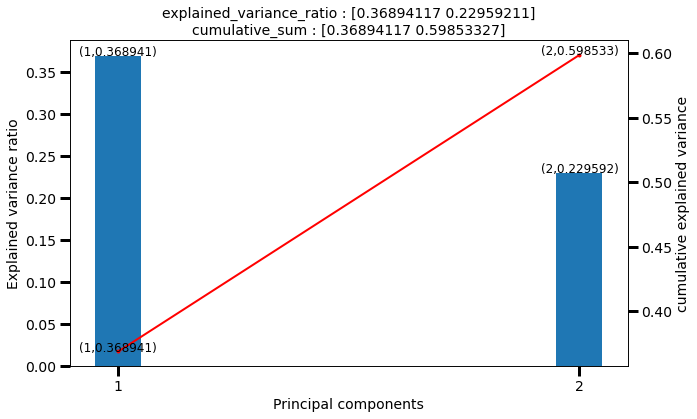

In [9]:
feature = x_test
feature = Zscore(feature)

pca = PCA(n_components = 2)

pca.fit(feature).transform(feature)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar([1,2], list(explained_variance_ratio), width = 0.1)
ax1.set_ylabel('Explained variance ratio',fontsize = 14)
ax1.set_xlabel('Principal components',fontsize = 14)
ax1.tick_params(axis = 'both',labelsize = 14, width = 3, length = 10)
for a, b in zip([1,2], list(explained_variance_ratio)):  
    ax1.text(a, b, f"({a},{b:.6f})", ha='center', va='baseline', fontsize=12)

ax2 = ax1.twinx() 
ax2.plot([1,2], list(cumulative_sum), '.-r' ,linewidth = 2, label = 'cumulative_sum')
ax2.set_ylabel('cumulative explained variance',fontsize = 14)
ax2.tick_params(axis = 'both',labelsize = 14, width = 3, length = 10)
ax1.set_title(f"explained_variance_ratio : {explained_variance_ratio}\ncumulative_sum : {cumulative_sum}",fontsize = 14)
for a, b in zip([1,2], list(cumulative_sum)):  
    ax2.text(a, b, f"({a},{b:.6f})", ha='center', va='baseline', fontsize=12)

ax1.grid(False)
ax2.grid(False)

plt.xticks([1,2])
plt.show()

Text(0, 0.5, 'principal\xa0component\xa02')

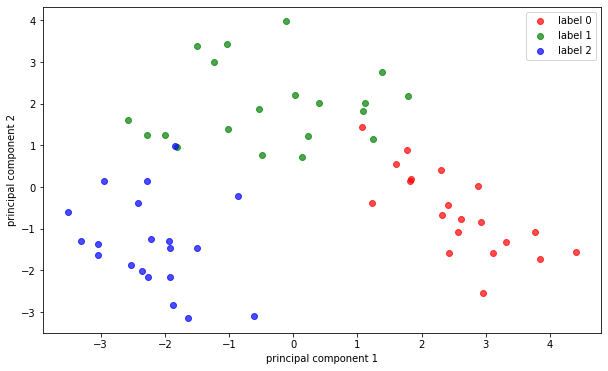

In [10]:
pc1 = pca.fit_transform(feature)
pc1_df = pd.DataFrame(pc1, columns=['pc_1', 'pc_2'])
pc1_df['label'] = y_test

label0 = pc1_df[pc1_df['label'] == 0]
label1 = pc1_df[pc1_df['label'] == 1]
label2 = pc1_df[pc1_df['label'] == 2]

plt.figure(figsize=(10,6))
plt.scatter(label0['pc_1'], label0['pc_2'], alpha=0.7, color = 'red', label='label 0')
plt.scatter(label1['pc_1'], label1['pc_2'], alpha=0.7, color = 'green', label='label 1')
plt.scatter(label2['pc_1'], label2['pc_2'], alpha=0.7, color = 'blue', label='label 2')
plt.legend(loc='best')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

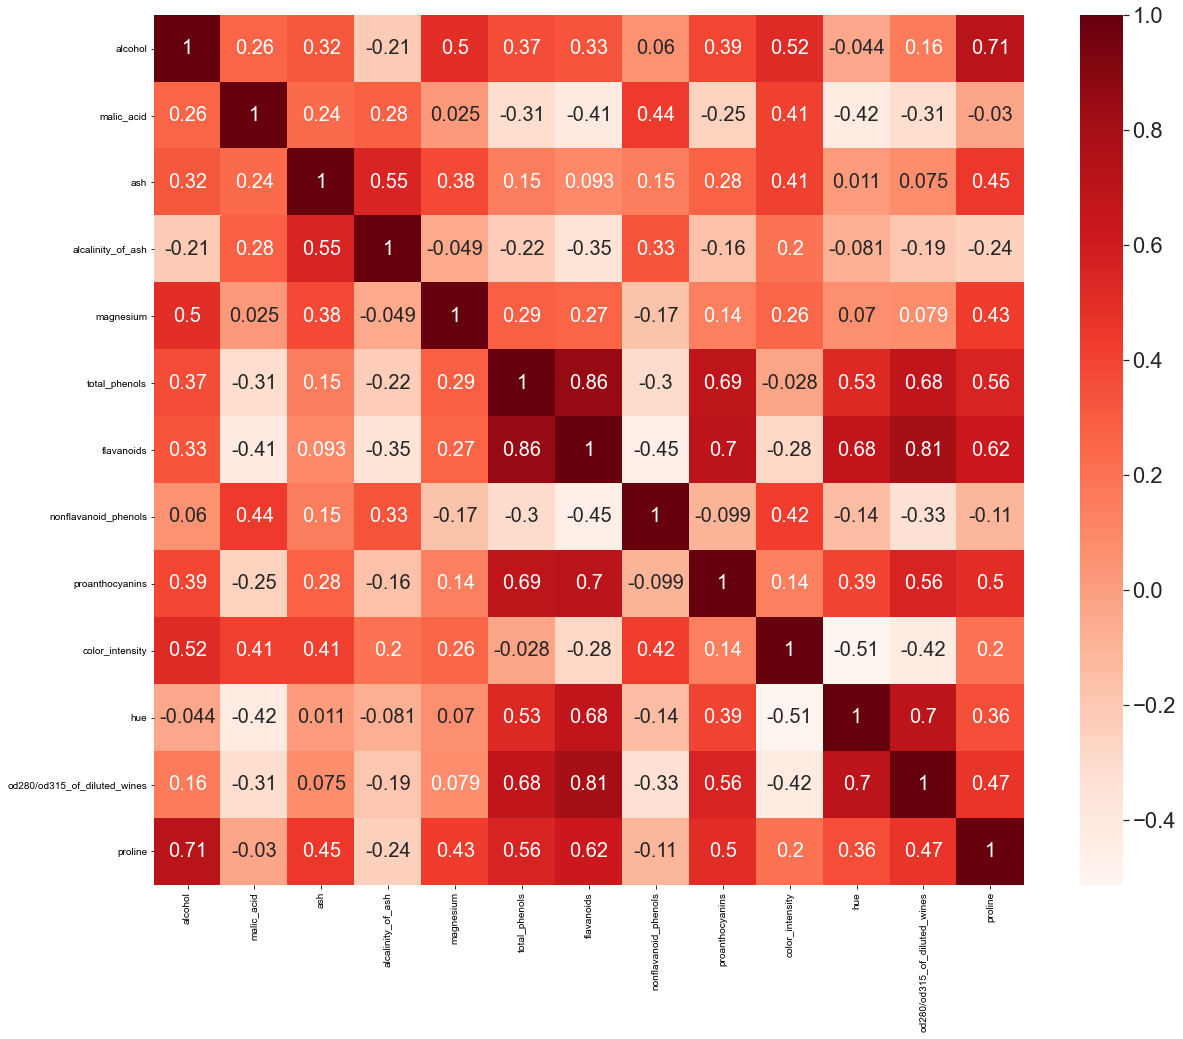

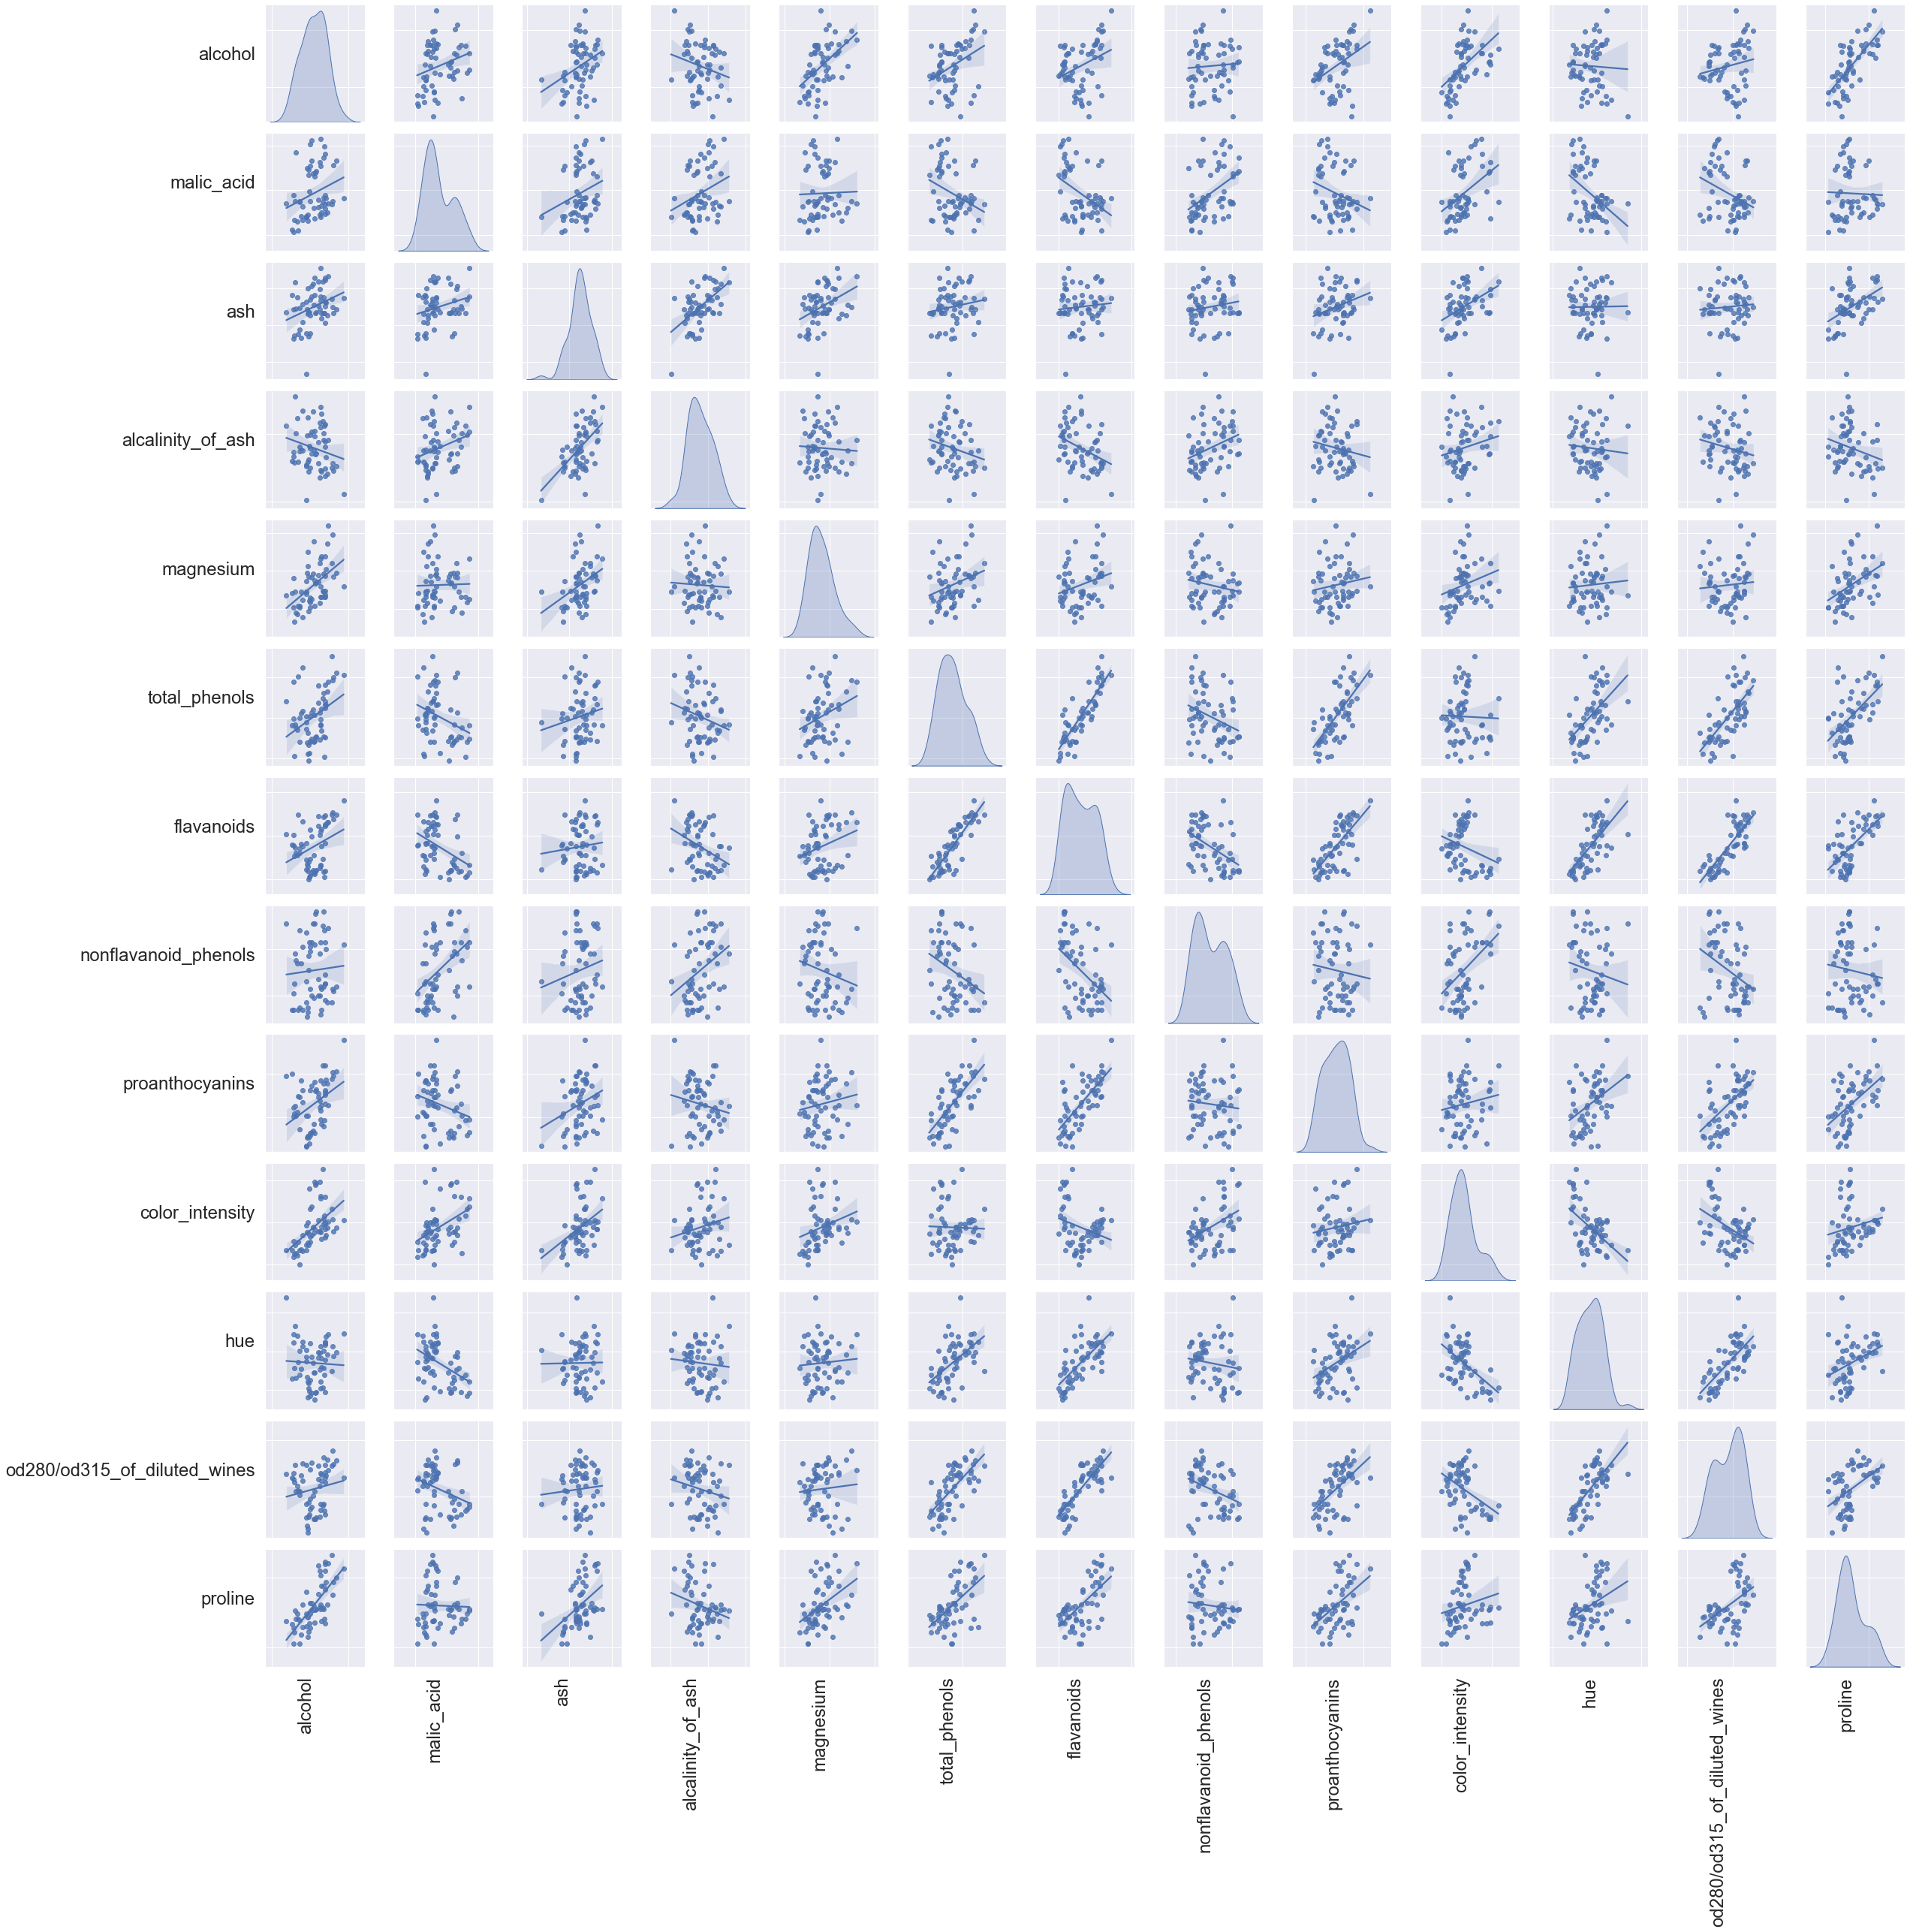

In [11]:
correlation = test.reset_index().drop(["target","index"], axis = 1).corr()
fig, ax = plt.subplots(figsize=(20, 16))
sns.set(font_scale=2)
sns.heatmap(correlation, annot=True, annot_kws={'size':20}, cmap='Reds', square=True, ax = ax)
pairplot_fig = sns.pairplot(test.drop('target', axis='columns'),kind="reg",diag_kind="kde")
pairplot_fig.set(xticklabels=[], yticklabels=[])
for ax in pairplot_fig.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90,ha='right')
    ax.set_ylabel(ax.get_ylabel(), rotation=0,ha='right')